# **PhawAI: Predicción de enfermedades coronarias**

## **Resumen**

El desafío consiste en desarrollar un modelo de machine learning para predecir la presencia de enfermedades coronarias en individuos usando un conjunto de datos real proporcionado por el Behavioral Risk Factor Surveillance System (BRFSS) de 2022 [1]. Este dataset incluye información demográfica, comportamientos de salud, y condiciones previas diagnosticadas, presentando además un desbalance de clases significativo entre los casos positivos y negativos de enfermedad coronaria. Los participantes deben explorar técnicas avanzadas de balanceo de clases, limpieza de datos y selección de características para optimizar la precisión en la detección de enfermedades del corazón.

## **Dataset**

El dataset BRFSS 2022 [1] contiene aproximadamente 438,000 registros provenientes de encuestas telefónicas realizadas en los Estados Unidos, incluyendo sus territorios. De las 328 variables disponibles en el dataset completo, se han seleccionado las siguientes 27 variables consideradas más relevantes para la predicción de enfermedades coronarias. La variable objetivo es "CHD_OR_MI", que indica con "1" si el individuo ha sido diagnosticado con enfermedad coronaria o infarto de miocardio y con "0" si el individuo no presenta ninguna enfermedad coronaria.

- CHD_OR_MI: Diagnóstico de enfermedad coronaria o infarto (variable objetivo)
- SEX: Género del encuestado
- AGE: Edad del encuestado
- HEALTH: Autoevaluación de la salud general
- PHYSICAL_HEALTH: Días de mala salud física en el último mes
- MENTAL_HEALTH: Días de mala salud mental en el último mes
- PHYSICAL_ACTIVITIES: Realización de actividad física regular
- BLOOD_PRESSURE: Diagnóstico de presión arterial alta
- HIGH_CHOLESTEROL: Diagnóstico de colesterol alto
- SKIN_CANCER: Diagnóstico previo de cáncer de piel
- CANCER: Diagnóstico de cáncer, excluyendo cáncer de piel
- BRONCHITIS: Diagnóstico previo de bronquitis
- DEPRESSIVE_DISORDER: Diagnóstico previo de trastorno depresivo
- KIDNEY_DISEASE: Diagnóstico previo de enfermedad renal
- DIABETES: Diagnóstico previo de diabetes
- ARTHRITIS: Diagnóstico previo de artritis
- BMI: Índice de Masa Corporal
- DIFFICULTY_WALKING: Dificultad para caminar
- SMOKE: Ha fumado al menos 100 cigarrillos en la vida
- TABACCO_PRODUCTS: Uso de otros productos de tabaco
- E_CIGARETTES: Uso de cigarrillos electrónicos
- HEAVY_DRINKERS: Consumo elevado de alcohol
- HIV: Diagnóstico de VIH
- FRUITS: Consumo regular de frutas
- VEGETABLES: Consumo regular de vegetales
- FRIED_POTATOES: Frecuencia de consumo de papas fritas
- ETHNICITY: Etnia del encuestado
- ID: Código del paciente

## **Exploración inicial del dataset**

### **1. Carga de Datos**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train_path = 'train.csv'  # Ruta al dataset de entrenamiento
test_public_path = 'test_public.csv'  # Ruta al dataset de prueba público
test_private_path = 'test_private.csv'  # Ruta al dataset de prueba privado

# Leer los archivos CSV en DataFrames
train_df = pd.read_csv(train_path)
test_public_df = pd.read_csv(test_public_path)
test_private_df = pd.read_csv(test_private_path)

In [26]:
# Dimensiones del dataset (número de filas y columnas)
print("Dimensiones del dataset:", train_df.shape)

# Tipos de datos
print("\nTipos de datos por columna:")
print(train_df.dtypes)

Dimensiones del dataset: (347246, 28)

Tipos de datos por columna:
CHD_OR_MI              float64
SEX                      int64
AGE                      int64
HEALTH                 float64
PHYSICAL_HEALTH        float64
MENTAL_HEALTH          float64
PHYSICAL_ACTIVITIES    float64
BLOOD_PRESSURE         float64
HIGH_CHOLESTEROL       float64
SKIN_CANCER            float64
CANCER                 float64
BRONCHITIS             float64
DEPRESSIVE_DISORDER    float64
KIDNEY_DISEASE         float64
DIABETES               float64
ARTHRITIS              float64
BMI                    float64
DIFFICULTY_WALKING     float64
SMOKE                  float64
TABACCO_PRODUCTS       float64
E_CIGARETTES           float64
HEAVY_DRINKERS         float64
HIV                    float64
FRUITS                 float64
VEGETABLES             float64
FRIED_POTATOES         float64
ETHNICITY                int64
ID                      object
dtype: object


In [27]:
# Vista previa de las primeras filas
print("\nPrimeras filas del dataset:")
train_df.head()


Primeras filas del dataset:


,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,1.0,1,34,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1,PID2022_316043
1,0.0,1,76,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,3.0,4.0,1.0,NaN,2.0,NaN,3.0,1,PID2022_024501
2,1.0,2,69,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,2,PID2022_393860
3,1.0,2,36,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,5,PID2022_029988
4,1.0,2,21,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_308442


### **2. Valores faltantes**

In [28]:
# Valores faltantes por columna
print("Valores faltantes por columna:")
print(train_df.isnull().sum().sort_values(ascending=False))

Valores faltantes por columna:
HIGH_CHOLESTEROL       50191
VEGETABLES             47387
HIV                    40794
FRUITS                 40254
BMI                    36960
FRIED_POTATOES         35302
HEAVY_DRINKERS         27583
SMOKE                  19263
E_CIGARETTES           18884
TABACCO_PRODUCTS       18033
DIFFICULTY_WALKING     15604
PHYSICAL_HEALTH         7306
MENTAL_HEALTH           6034
ARTHRITIS               1954
DEPRESSIVE_DISORDER     1686
BRONCHITIS              1313
BLOOD_PRESSURE          1307
KIDNEY_DISEASE          1131
SKIN_CANCER              867
HEALTH                   838
CANCER                   792
PHYSICAL_ACTIVITIES      653
DIABETES                 530
ETHNICITY                  0
CHD_OR_MI                  0
SEX                        0
AGE                        0
ID                         0
dtype: int64


### **3. Distribución de la variable objetivo (CHD_OR_MI)**

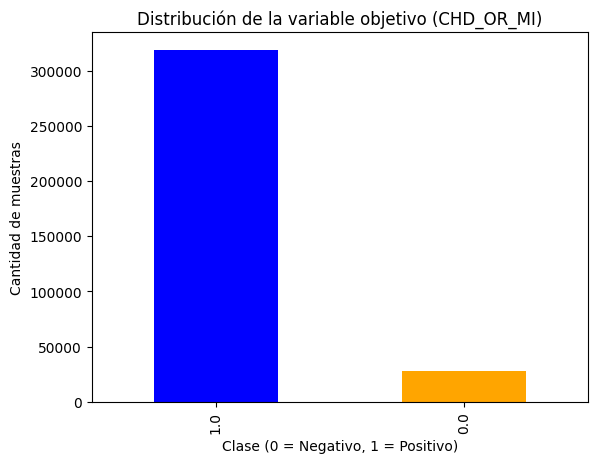

In [29]:
import matplotlib.pyplot as plt

# Gráfico de distribución de la variable objetivo
train_df['CHD_OR_MI'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de la variable objetivo (CHD_OR_MI)')
plt.xlabel('Clase (0 = Negativo, 1 = Positivo)')
plt.ylabel('Cantidad de muestras')
plt.show()

### **4. Análisis de correlación entre variables numéricas**

Correlaciones con la variable objetivo (CHD_OR_MI):
CHD_OR_MI              1.000000
DIFFICULTY_WALKING     0.201933
BRONCHITIS             0.173195
HIGH_CHOLESTEROL       0.170687
DIABETES               0.166302
ARTHRITIS              0.157160
KIDNEY_DISEASE         0.143747
SMOKE                  0.109667
CANCER                 0.093516
SKIN_CANCER            0.091919
SEX                    0.071103
DEPRESSIVE_DISORDER    0.039591
ETHNICITY              0.033409
HEAVY_DRINKERS         0.027429
TABACCO_PRODUCTS       0.003289
FRUITS                -0.003845
MENTAL_HEALTH         -0.007364
E_CIGARETTES          -0.014002
VEGETABLES            -0.017577
HIV                   -0.020797
FRIED_POTATOES        -0.022453
BMI                   -0.041501
PHYSICAL_ACTIVITIES   -0.095303
PHYSICAL_HEALTH       -0.152926
BLOOD_PRESSURE        -0.212952
HEALTH                -0.219629
AGE                   -0.225322
Name: CHD_OR_MI, dtype: float64


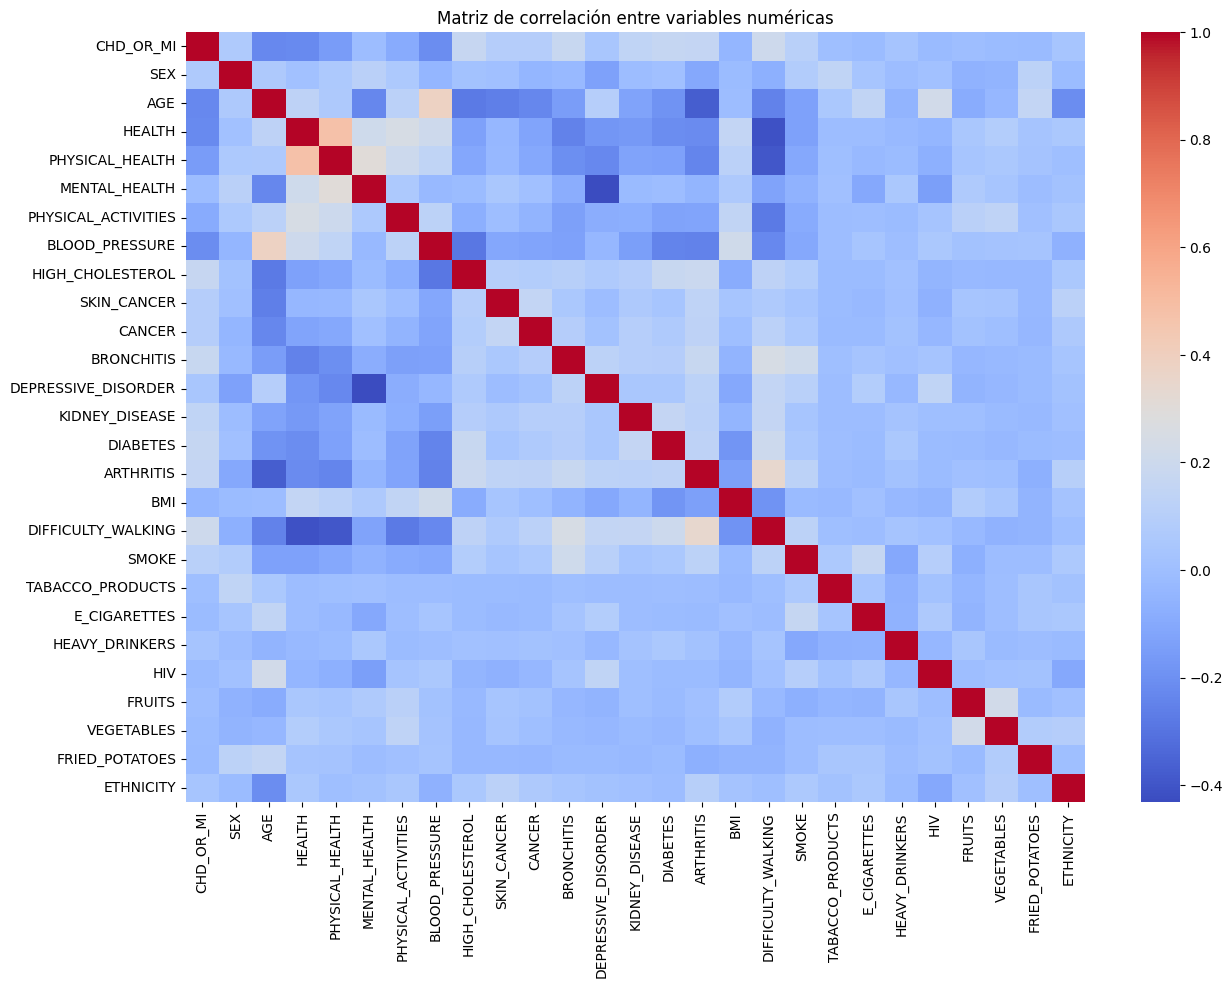

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
train_numeric = train_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = train_numeric.corr()

# Mostrar las correlaciones con 'CHD_OR_MI' en texto
correlation_with_target = correlation_matrix['CHD_OR_MI'].sort_values(ascending=False)
print("Correlaciones con la variable objetivo (CHD_OR_MI):")
print(correlation_with_target)

# Crear un heatmap para visualizar todas las correlaciones
plt.figure(figsize=(14.5, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### **5. Análisis combinado: Valores faltantes y relevancia**

In [31]:
# Análisis combinado: Valores faltantes y correlación
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_correlation = correlation_with_target[missing_data.index]

missing_analysis = pd.DataFrame({
    "Missing Values": missing_data,
    "Correlation with CHD_OR_MI": missing_data_correlation
}).sort_values(by="Missing Values", ascending=False)

print("Análisis combinado de valores faltantes y relevancia:")
print(missing_analysis)

Análisis combinado de valores faltantes y relevancia:
                     Missing Values  Correlation with CHD_OR_MI
HIGH_CHOLESTEROL              50191                    0.170687
VEGETABLES                    47387                   -0.017577
HIV                           40794                   -0.020797
FRUITS                        40254                   -0.003845
BMI                           36960                   -0.041501
FRIED_POTATOES                35302                   -0.022453
HEAVY_DRINKERS                27583                    0.027429
SMOKE                         19263                    0.109667
E_CIGARETTES                  18884                   -0.014002
TABACCO_PRODUCTS              18033                    0.003289
DIFFICULTY_WALKING            15604                    0.201933
PHYSICAL_HEALTH                7306                   -0.152926
MENTAL_HEALTH                  6034                   -0.007364
ARTHRITIS                      1954               

## **Limpieza y Preprocesamiento de Datos**

### **1. Tratamiento de Outliers y Transformaciones de Variables**


Tratando outliers en: AGE
Límite inferior: -3.5, Límite superior: 112.5


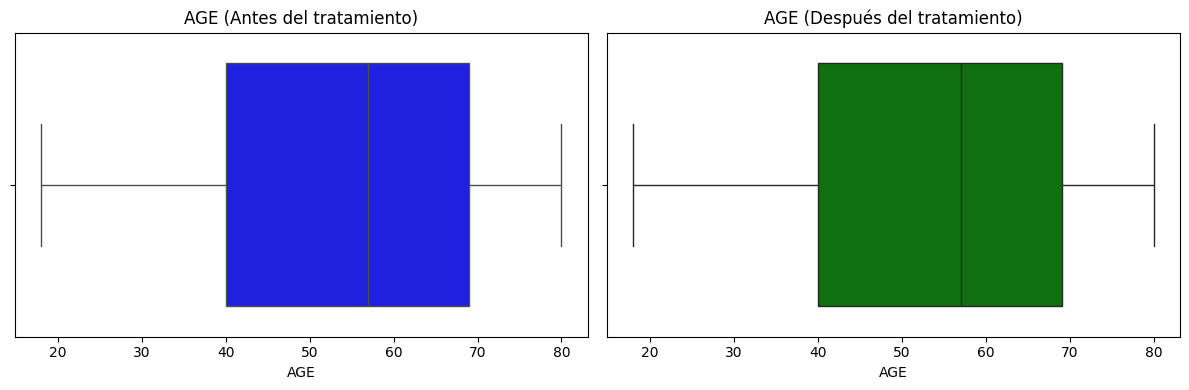


Tratando outliers en: BMI
Límite inferior: 1272.5, Límite superior: 4316.5


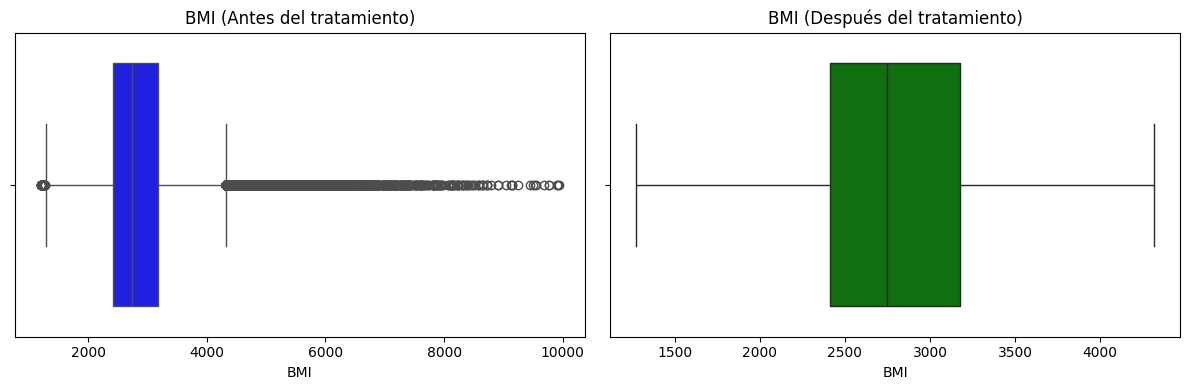

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para detectar y tratar outliers usando el método IQR
def detect_and_treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico

    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior

    print(f"\nTratando outliers en: {col}")
    print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")

    # Visualización antes y después del tratamiento (juntos)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)  # Antes del tratamiento
    sns.boxplot(x=df[col], color='blue')
    plt.title(f"{col} (Antes del tratamiento)")

    # Aplicar capping: reemplazar valores fuera de los límites
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    plt.subplot(1, 2, 2)  # Después del tratamiento
    sns.boxplot(x=df[col], color='green')
    plt.title(f"{col} (Después del tratamiento)")
    plt.tight_layout()
    plt.show()

# Variables para tratamiento de outliers
outlier_columns = ['AGE', 'BMI']

# Aplicar tratamiento de outliers
for col in outlier_columns:
    detect_and_treat_outliers(train_df, col)

### **2. Tratamiento de Valores Faltantes**

In [33]:
# Eliminar variables irrelevantes o con muchos valores faltantes
# Estas columnas tienen baja relevancia (baja correlación con CHD_OR_MI) y muchos valores faltantes
columns_to_drop = ['FRUITS', 'TABACCO_PRODUCTS', 'MENTAL_HEALTH', 'E_CIGARETTES', 'VEGETABLES', 'FRIED_POTATOES', 'HEAVY_DRINKERS', 'ID']
train_df = train_df.drop(columns=columns_to_drop)
print("\nColumnas eliminadas debido a baja relevancia o muchos valores faltantes:", columns_to_drop)

# Imputar valores faltantes en columnas numéricas con mediana
# Variables numéricas que serán imputadas con la mediana
columns_to_impute_median = ['AGE', 'BMI']

for col in columns_to_impute_median:
    train_df[col].fillna(train_df[col].median(), inplace=True)
print("\nImputación realizada con la mediana en las siguientes columnas (numéricas):", columns_to_impute_median)

# Imputar valores faltantes en columnas categóricas con moda
# Variables categóricas que serán imputadas con la moda
columns_to_impute_mode = [
    'SEX', 'HEALTH', 'PHYSICAL_HEALTH', 'PHYSICAL_ACTIVITIES',
    'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL', 'SKIN_CANCER',
    'CANCER', 'BRONCHITIS', 'DEPRESSIVE_DISORDER',
    'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS',
    'DIFFICULTY_WALKING', 'SMOKE', 'ETHNICITY', 'HIV'
]

for col in columns_to_impute_mode:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
print("\nImputación realizada con la moda en las siguientes columnas (categóricas):", columns_to_impute_mode)

# Verificar valores faltantes finales
# Asegurarse de que no queden valores faltantes en el dataset
print("\nValores faltantes después de la limpieza completa:")
print(train_df.isnull().sum().sort_values(ascending=False))


Columnas eliminadas debido a baja relevancia o muchos valores faltantes: ['FRUITS', 'TABACCO_PRODUCTS', 'MENTAL_HEALTH', 'E_CIGARETTES', 'VEGETABLES', 'FRIED_POTATOES', 'HEAVY_DRINKERS', 'ID']

Imputación realizada con la mediana en las siguientes columnas (numéricas): ['AGE', 'BMI']

Imputación realizada con la moda en las siguientes columnas (categóricas): ['SEX', 'HEALTH', 'PHYSICAL_HEALTH', 'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL', 'SKIN_CANCER', 'CANCER', 'BRONCHITIS', 'DEPRESSIVE_DISORDER', 'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS', 'DIFFICULTY_WALKING', 'SMOKE', 'ETHNICITY', 'HIV']

Valores faltantes después de la limpieza completa:
CHD_OR_MI              0
SEX                    0
HIV                    0
SMOKE                  0
DIFFICULTY_WALKING     0
BMI                    0
ARTHRITIS              0
DIABETES               0
KIDNEY_DISEASE         0
DEPRESSIVE_DISORDER    0
BRONCHITIS             0
CANCER                 0
SKIN_CANCER            0
HIGH_CH

### **3. Análisis exploratorio adicional**

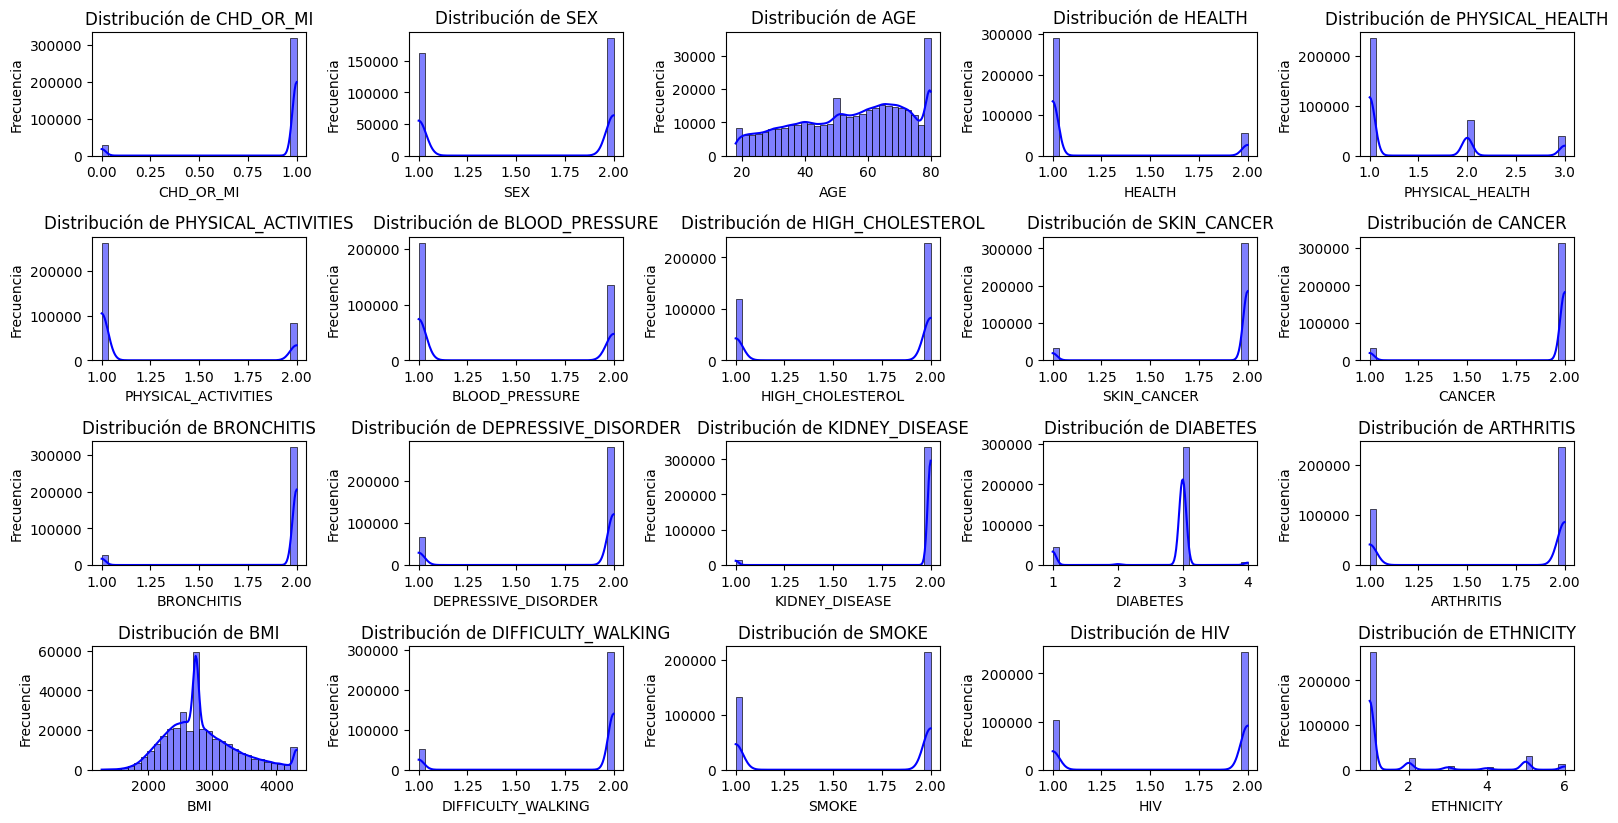

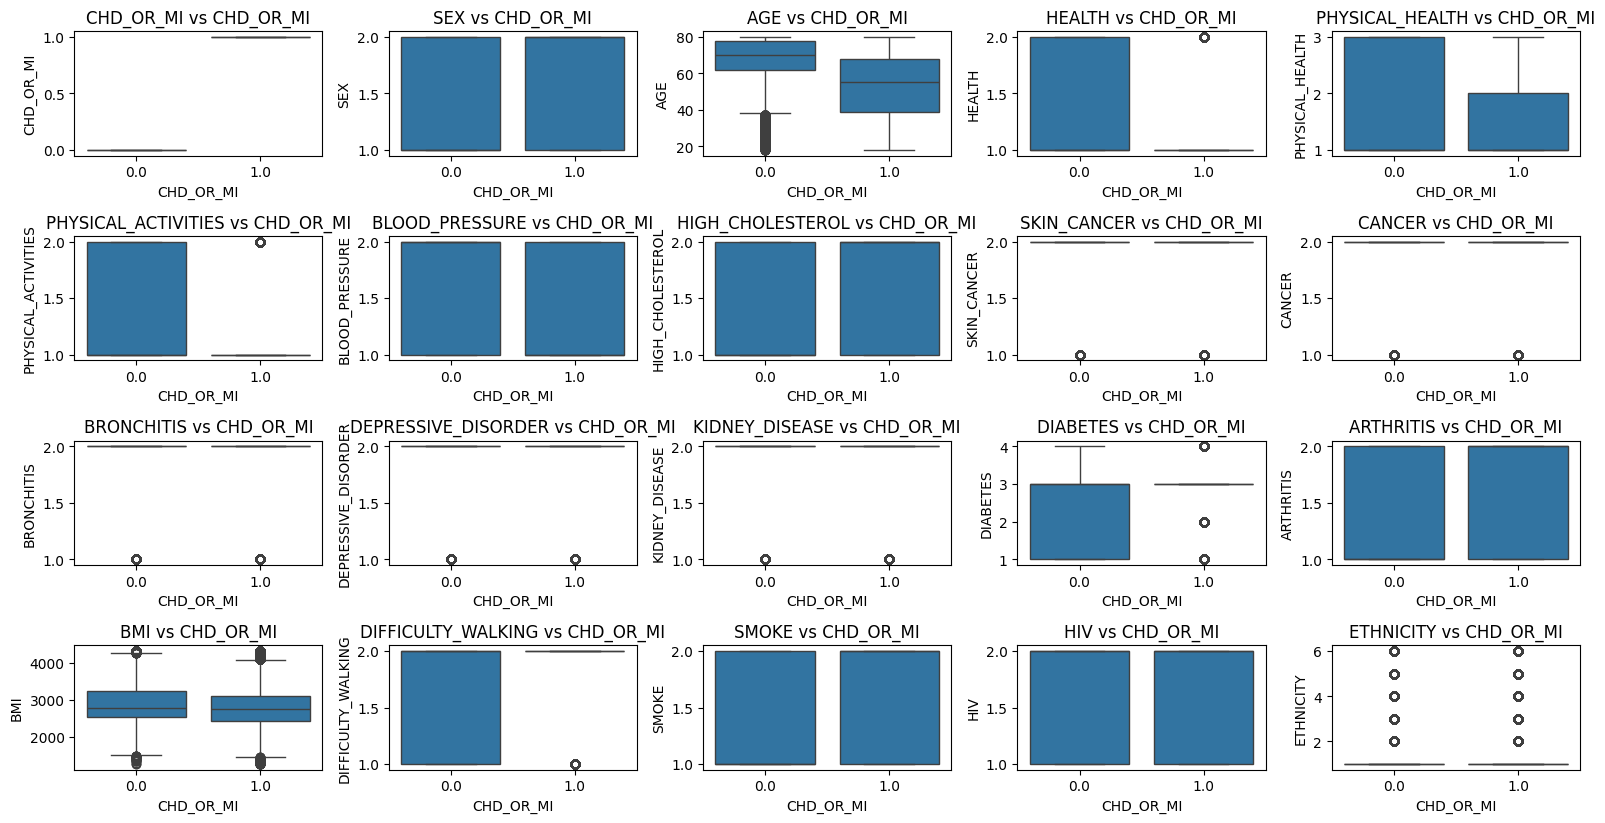

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# PASO 1: Visualización de distribuciones de variables numéricas
num_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_columns):
    plt.subplot(6, 5, i + 1)  # Crear subgráficos dinámicos
    sns.histplot(train_df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# PASO 2: Relación entre variables numéricas y CHD_OR_MI
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(data=train_df, x='CHD_OR_MI', y=col)  # Eliminamos `palette`
    plt.title(f"{col} vs CHD_OR_MI")
    plt.xlabel('CHD_OR_MI')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **Balanceo de Clases**

Distribución de clases antes del balanceo:
Counter({1.0: 318988, 0.0: 28258})

Distribución de clases después de aplicar SMOTE:
Counter({1.0: 318988, 0.0: 318988})


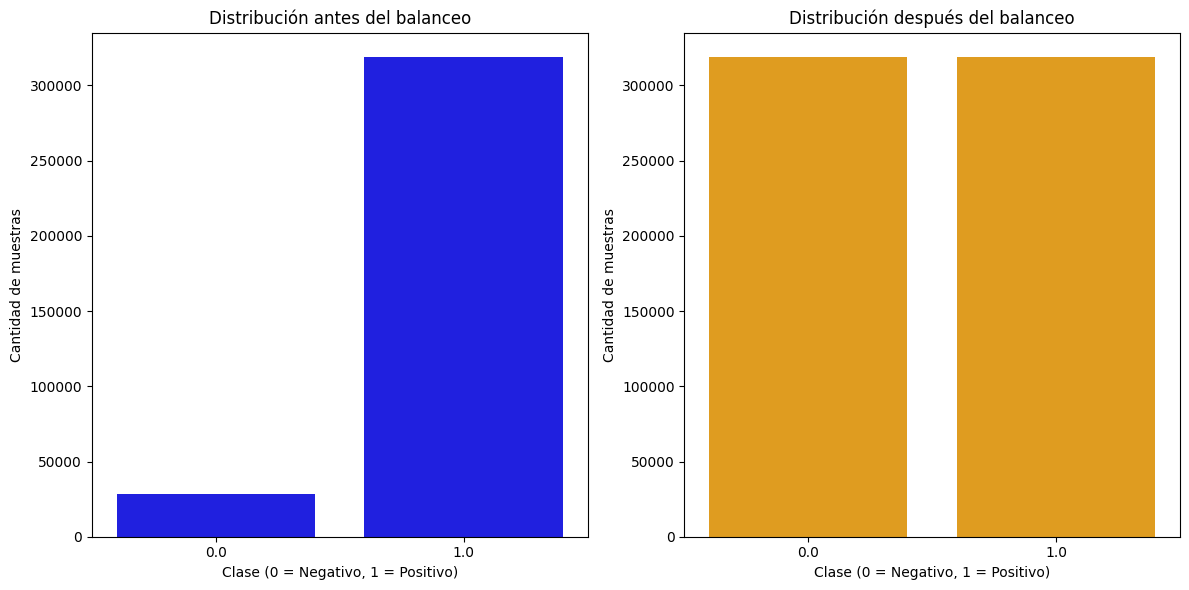

In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Definir X e y para el balanceo
X = train_df.drop(columns=['CHD_OR_MI'])
y = train_df['CHD_OR_MI']

# Verificar la distribución de clases antes del balanceo
print("Distribución de clases antes del balanceo:")
print(Counter(y))

# Visualización de la distribución antes del balanceo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y, color='blue')
plt.title('Distribución antes del balanceo')
plt.xlabel('Clase (0 = Negativo, 1 = Positivo)')
plt.ylabel('Cantidad de muestras')

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases
print("\nDistribución de clases después de aplicar SMOTE:")
print(Counter(y_resampled))

# Visualización de la distribución después del balanceo
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, color='orange')
plt.title('Distribución después del balanceo')
plt.xlabel('Clase (0 = Negativo, 1 = Positivo)')
plt.ylabel('Cantidad de muestras')

# Mostrar los gráficos juntos
plt.tight_layout()
plt.show()

## **Entrenamiento del modelo**

### **Modelo 1: Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Dividir los datos balanceados en entrenamiento y validación
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar el modelo Random Forest con ajustes más flexibles
print("Entrenando el modelo Random Forest con ajustes optimizados...")
model_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=300,  # Incrementar el número de árboles
    max_depth=None,  # Sin límite en la profundidad
    class_weight='balanced',
    n_jobs=-1
)
model_rf.fit(X_train_rf, y_train_rf)

# Evaluar el modelo en el conjunto de validación
y_pred_rf = model_rf.predict(X_val_rf)

# Calcular el F1-Score y mostrar el reporte de clasificación
f1_rf = f1_score(y_val_rf, y_pred_rf)
print(f"\nF1-Score en el conjunto de validación: {f1_rf:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_val_rf, y_pred_rf))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_val_rf, y_pred_rf))

Entrenando el modelo Random Forest con ajustes optimizados...

F1-Score en el conjunto de validación: 0.9523

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     63798
         1.0       0.93      0.98      0.95     63798

    accuracy                           0.95    127596
   macro avg       0.95      0.95      0.95    127596
weighted avg       0.95      0.95      0.95    127596


Matriz de Confusión:
[[58895  4903]
 [ 1353 62445]]


### **Modelo 2: Gradient Boosting**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Dividir los datos balanceados en entrenamiento y validación
X_train_gb, X_val_gb, y_train_gb, y_val_gb = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar el modelo Gradient Boosting
print("\nEntrenando el modelo Gradient Boosting...")
model_gb = GradientBoostingClassifier(
    random_state=42,
    n_estimators=300,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=5  # Profundidad máxima de los árboles
)
model_gb.fit(X_train_gb, y_train_gb)

# Evaluar el modelo en el conjunto de validación
y_pred_gb = model_gb.predict(X_val_gb)

# Calcular el F1-Score y mostrar el reporte de clasificación
f1_gb = f1_score(y_val_gb, y_pred_gb)
print(f"\nF1-Score en el conjunto de validación: {f1_gb:.4f}")

print("\nReporte de Clasificación:")
print(classification_report(y_val_gb, y_pred_gb))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_val_gb, y_pred_gb))


Entrenando el modelo Gradient Boosting...

F1-Score en el conjunto de validación: 0.9560

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     63798
         1.0       0.92      0.99      0.96     63798

    accuracy                           0.95    127596
   macro avg       0.96      0.95      0.95    127596
weighted avg       0.96      0.95      0.95    127596


Matriz de Confusión:
[[58334  5464]
 [  375 63423]]


### **Modelo 3: XGBoost Classifier**

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Dividir los datos balanceados en entrenamiento y validación
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar el modelo XGBoost
print("Entrenando el modelo XGBoost...")
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,  # Número de árboles
    max_depth=6,       # Profundidad máxima
    learning_rate=0.1, # Tasa de aprendizaje
    eval_metric='logloss', # Métrica para clasificación binaria
    n_jobs=-1
)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Evaluar el modelo en el conjunto de validación
y_pred_xgb = xgb_model.predict(X_val_xgb)

# Calcular el F1-Score y mostrar el reporte de clasificación
f1_xgb = f1_score(y_val_xgb, y_pred_xgb)
print(f"\nF1-Score en el conjunto de validación (XGBoost): {f1_xgb:.4f}")

print("\nReporte de Clasificación (XGBoost):")
print(classification_report(y_val_xgb, y_pred_xgb))

# Matriz de Confusión
print("\nMatriz de Confusión (XGBoost):")
print(confusion_matrix(y_val_xgb, y_pred_xgb))

Entrenando el modelo XGBoost...

F1-Score en el conjunto de validación (XGBoost): 0.9540

Reporte de Clasificación (XGBoost):
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     63798
         1.0       0.92      0.99      0.95     63798

    accuracy                           0.95    127596
   macro avg       0.96      0.95      0.95    127596
weighted avg       0.96      0.95      0.95    127596


Matriz de Confusión (XGBoost):
[[58115  5683]
 [  434 63364]]


### **Modelo 4: LightGBM Classifier**

In [39]:
from lightgbm import LGBMClassifier

# 1. Dividir los datos balanceados en entrenamiento y validación
X_train_lgbm, X_val_lgbm, y_train_lgbm, y_val_lgbm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Entrenar el modelo LightGBM
print("Entrenando el modelo LightGBM...")
lgbm_model = LGBMClassifier(
    random_state=42,
    n_estimators=300,  # Número de árboles
    max_depth=6,       # Profundidad máxima
    learning_rate=0.1, # Tasa de aprendizaje
    class_weight='balanced',  # Manejar clases desbalanceadas
    n_jobs=-1
)
lgbm_model.fit(X_train_lgbm, y_train_lgbm)

# Evaluar el modelo en el conjunto de validación
y_pred_lgbm = lgbm_model.predict(X_val_lgbm)

# Calcular el F1-Score y mostrar el reporte de clasificación
f1_lgbm = f1_score(y_val_lgbm, y_pred_lgbm)
print(f"\nF1-Score en el conjunto de validación (LightGBM): {f1_lgbm:.4f}")

print("\nReporte de Clasificación (LightGBM):")
print(classification_report(y_val_lgbm, y_pred_lgbm))

# Matriz de Confusión
print("\nMatriz de Confusión (LightGBM):")
print(confusion_matrix(y_val_lgbm, y_pred_lgbm))

Entrenando el modelo LightGBM...
[LightGBM] [Info] Number of positive: 255190, number of negative: 255190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4345
[LightGBM] [Info] Number of data points in the train set: 510380, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

F1-Score en el conjunto de validación (LightGBM): 0.9559

Reporte de Clasificación (LightGBM):
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     63798
         1.0       0.92      0.99      0.96     63798

    accuracy                           0.95    127596
   macro avg       0.96      0.95      0.95    127596
weighted avg       0.96      0.95      0.95    127596


Matriz de Confusión (LightGBM):
[[583

## **Descarga de resultados**

In [44]:
# Almacenar los modelos y sus respectivos F1-Scores
model_results = []

# Definir las columnas a eliminar, pero conservar 'ID' en los conjuntos de prueba
columns_to_drop_test = ['FRUITS', 'TABACCO_PRODUCTS', 'MENTAL_HEALTH', 'E_CIGARETTES',
                        'VEGETABLES', 'FRIED_POTATOES', 'HEAVY_DRINKERS']

# Eliminar columnas innecesarias, excepto 'ID'
test_public_df_cleaned = test_public_df.drop(columns=columns_to_drop_test, errors='ignore')
test_private_df_cleaned = test_private_df.drop(columns=columns_to_drop_test, errors='ignore')

# Asegurarse de que las columnas coincidan con las del modelo (excepto 'CHD_OR_MI')
test_public_df_cleaned = test_public_df_cleaned[train_df.columns.drop('CHD_OR_MI')]
test_private_df_cleaned = test_private_df_cleaned[train_df.columns.drop('CHD_OR_MI')]

# Imputar valores faltantes en los datos de prueba
columns_to_impute_median = ['AGE', 'BMI']
columns_to_impute_mode = [
    'SEX', 'HEALTH', 'PHYSICAL_HEALTH', 'PHYSICAL_ACTIVITIES',
    'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL', 'SKIN_CANCER',
    'CANCER', 'BRONCHITIS', 'DEPRESSIVE_DISORDER',
    'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS',
    'DIFFICULTY_WALKING', 'SMOKE', 'ETHNICITY', 'HIV'
]

# Imputar con la mediana para columnas numéricas
for col in columns_to_impute_median:
    test_public_df_cleaned.loc[:, col] = test_public_df_cleaned[col].fillna(train_df[col].median())
    test_private_df_cleaned.loc[:, col] = test_private_df_cleaned[col].fillna(train_df[col].median())

# Imputar con la moda para columnas categóricas
for col in columns_to_impute_mode:
    test_public_df_cleaned.loc[:, col] = test_public_df_cleaned[col].fillna(train_df[col].mode()[0])
    test_private_df_cleaned.loc[:, col] = test_private_df_cleaned[col].fillna(train_df[col].mode()[0])

# Comparar F1-Scores y seleccionar el mejor modelo
best_model = None
best_f1_score = 0
for model_name, model, f1_score_value in [
    ("Random Forest", model_rf, f1_rf),
    ("Gradient Boosting", model_gb, f1_gb),
    ("XGBoost", xgb_model, f1_xgb),
    ("LightGBM", lgbm_model, f1_lgbm)
]:
    model_results.append((model_name, f1_score_value))
    if f1_score_value > best_f1_score:
        best_f1_score = f1_score_value
        best_model = model

# Realizar predicciones con el mejor modelo en los conjuntos de prueba
print(f"El modelo con el mejor F1-Score es: {best_model.__class__.__name__} con F1-Score: {best_f1_score:.4f}")

test_public_pred = best_model.predict(test_public_df_cleaned)
test_private_pred = best_model.predict(test_private_df_cleaned)

# Crear DataFrames con las predicciones, asegurando que la columna 'ID' esté presente
submission_public = pd.DataFrame({'ID': test_public_df['ID'], 'CHD_OR_MI': test_public_pred})
submission_private = pd.DataFrame({'ID': test_private_df['ID'], 'CHD_OR_MI': test_private_pred})

# Combinar ambos DataFrames en un solo archivo
final_submission = pd.concat([submission_public, submission_private], axis=0)

# Asegurar el formato correcto
final_submission['CHD_OR_MI'] = final_submission['CHD_OR_MI'].astype(int)  # Convertir predicciones a enteros
final_submission.to_csv('resultados.csv', index=False)

print("Archivo 'resultados.csv' generado correctamente con las predicciones combinadas.")

# Imprimir los resultados de todos los modelos para referencia
print("\nResultados de los modelos:")
for model_name, f1_score_value in model_results:
    print(f"{model_name}: F1-Score = {f1_score_value:.4f}")

El modelo con el mejor F1-Score es: GradientBoostingClassifier con F1-Score: 0.9560
Archivo 'resultados.csv' generado correctamente con las predicciones combinadas.

Resultados de los modelos:
Random Forest: F1-Score = 0.9523
Gradient Boosting: F1-Score = 0.9560
XGBoost: F1-Score = 0.9540
LightGBM: F1-Score = 0.9559
